In [2]:
import pandas as pd
import wandb
class Results():
    def __init__(self):
        num_seeds = 5
        columns = [f"nguyen_{i}" for i in range(1, 13, 1)]
        self.result_dict = {}
        for target in ['num_states_to_perfect_fit_test', 'time to perfect fit', 'num simulation to perfect fit']:
            self.result_dict[target] = {}
            self.result_dict[target]['results_grammar_1_Normal'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_1_Normal'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_grammar_1_AmEx'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_1_AmEx'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)

            self.result_dict[target]['results_grammar_2_Normal'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_2_Normal'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_grammar_2_AmEx'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_2_AmEx'] = pd.DataFrame(index=list(range(1, num_seeds + 1, 1)), columns=columns)

    def fill_results(self, config, summary):
        seed = config['seed']
        data_path = config['data_path']
        engine = config['MCTS_engine']
        prior = config['prior_source']
        dataset = config['data_path'].split('/')[1]
        for target in ['num_states_to_perfect_fit_test', 'time to perfect fit', 'num simulation to perfect fit']:
            value = summary[target]
            if 'data_grammar_1' in data_path and engine == 'Endgame' and prior == 'grammar':
                self.result_dict[target]['results_grammar_1_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Normal' and prior == 'grammar':
                self.result_dict[target]['results_grammar_1_Normal'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Endgame' and prior == 'uniform':
                self.result_dict[target]['results_uniform_1_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Normal' and prior == 'uniform':
                self.result_dict[target]['results_uniform_1_Normal'].loc[seed, dataset] = value

            elif 'data_grammar_2' in data_path and engine == 'Endgame' and prior == 'grammar':
                self.result_dict[target]['results_grammar_2_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Normal' and prior == 'grammar':
                self.result_dict[target]['results_grammar_2_Normal'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Endgame' and prior == 'uniform':
                self.result_dict[target]['results_uniform_2_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Normal' and prior == 'uniform':
                self.result_dict[target]['results_uniform_2_Normal'].loc[seed, dataset] = value


api = wandb.Api()
entity, project = "jgu-wandb", "neural_guided_symbolic_regression_final"
# Example: January 1st, 2024

# created_at (str): ISO timestamp when the run was started
runs = api.runs(entity + "/" + project, filters={"tags": {"$in": ["no_net"]}})

summary_list, config_list, name_list = [], [], []
results_obj = Results()

for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    result_dict = run.summary._json_dict
    try:
        summary_dict = run.summary._json_dict
        config_dict = {k: v for k, v in run.config.items() if not k.startswith("_")}
        results_obj.fill_results(config_dict, summary_dict)
    except Exception as e:
        pass#print(f"{e} their is a problem with {run.name} ")

print('end')

end


<Axes: xlabel='age'>

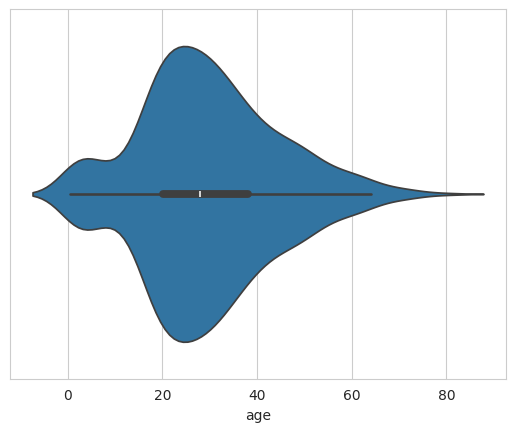

In [1]:
import seaborn as sns
 df = results_obj.result_dict[target][approach]
sns.violinplot(x=results_obj.["age"])